<a href="https://colab.research.google.com/github/Milechwan/if1015/blob/master/ProjetoIF1015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [0]:
import numpy as np
import pandas as pd
import io

dataset = pd.read_csv(io.StringIO(uploaded['googleplaystore.csv'].decode("ISO-8859-1")))

In [4]:
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


*Remoção de entradas duplicadas baseando-se apenas no nome dos aplicativos*

In [5]:
#dataset.drop_duplicates(subset=['App'],keep=False, inplace=True)
dataset.drop_duplicates(subset=['App'],keep='last', inplace=True)
print(len(dataset))

9660


In [6]:
dataset.Reviews.describe()

count     9660
unique    5333
top          0
freq       593
Name: Reviews, dtype: object

Baseando-se nos valores mostrados no .head(), pode-se inferir que essa coluna se trata da quantidade de resenhas (uma forma de avaliação que os usuários fazem para um aplicativo), portanto o tipo da coluna deve ser numérico, e não object.

In [7]:
dataset.Reviews = pd.to_numeric(dataset.Reviews)

ValueError: ignored

Faz-se a verificação dessa coluna com valor de string e que impediu a conversão para tipo numérico

In [8]:
dataset[dataset['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


**Aparentemente, a linha acima reflete uma entrada em que as informações estão nas colunas erradas. Ainda que isso fosse corrigido, não saberíamos sua categoria. Mais adiante, vemos que não há outras entradas além desta (caso fosse corrigida) sem a definição de categoria. Portanto, decidiu-se remover tal entrada.**

In [12]:
len(dataset[dataset['Category'].isna()])

0

In [13]:
dataset = dataset.drop(dataset[dataset['Price']=='Everyone'].index, axis = 0)
dataset.Reviews = pd.to_numeric(dataset.Reviews)
dataset.Reviews.describe()

count    9.659000e+03
mean     2.166512e+05
std      1.830738e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.690000e+02
75%      2.940100e+04
max      7.812821e+07
Name: Reviews, dtype: float64

In [14]:
dataset.Price.describe()

count     9659
unique      92
top          0
freq      8905
Name: Price, dtype: object

Vendo que a coluna de preço é de tipo objeto, faz-se uma verificação de como estão os dados de aplicativos pagos, ou seja, os que não são classificados na coluna Type como Free, que são 0

In [15]:
dataset[dataset['Type']!='Free']['Price']

290       $4.99
291       $4.99
427       $3.99
478       $1.49
479       $2.99
480       $3.99
481       $7.99
571       $3.99
851       $3.99
854       $3.99
995       $4.99
1001      $2.99
1227      $3.49
1228      $4.99
1335      $3.99
1341      $2.99
1347      $2.99
1832      $1.99
1833      $4.99
1834      $4.99
1835      $4.99
1836      $5.99
1837      $6.99
1838      $9.99
1839      $4.99
2062      $3.99
2085      $2.99
2086      $3.99
2087      $2.99
2150      $3.99
          ...  
10453     $2.99
10457     $2.99
10459     $1.99
10460     $1.00
10517     $1.49
10531     $3.49
10540     $2.99
10570     $1.99
10583     $6.99
10586     $0.99
10594     $1.99
10645     $8.99
10650     $5.49
10651     $6.49
10661     $5.99
10662     $6.49
10664     $6.49
10668     $6.49
10669     $5.99
10674     $5.49
10675     $0.99
10679     $2.99
10682     $0.99
10690     $0.99
10697     $0.99
10735     $0.99
10760     $7.99
10782    $16.99
10785     $1.20
10798     $1.04
Name: Price, Length: 755

**Remoção do símbolo $ para transformar o tipo da coluna Price em numérico**

In [16]:
dataset['Price'] = dataset['Price'].apply(lambda x: x[x.find('$')+1:] if x.find('$')>-1 else x)
dataset['Price'] = pd.to_numeric(dataset['Price'])
dataset.Price.describe()

count    9659.000000
mean        1.097231
std        16.851618
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [17]:
dataset[['Current Ver']].describe()

,Current Ver
count,9651
unique,2818
top,Varies with device
freq,1054


In [18]:
dataset[['Last Updated']].describe()

,Last Updated
count,9659
unique,1377
top,"August 3, 2018"
freq,252


Convertendo tipo da coluna 'Last Updated' para datetime

In [0]:
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'])

In [20]:
dataset['Last Updated'].describe()

count                    9659
unique                   1377
top       2018-08-03 00:00:00
freq                      252
first     2010-05-21 00:00:00
last      2018-08-08 00:00:00
Name: Last Updated, dtype: object

In [21]:
dataset[['Android Ver']].describe()

,Android Ver
count,9657
unique,33
top,4.1 and up
freq,2206


In [22]:
dataset.Category.describe()

count       9659
unique        33
top       FAMILY
freq        1906
Name: Category, dtype: object

In [23]:
dataset.Rating.describe()

count    8196.000000
mean        4.173219
std         0.536269
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [24]:
dataset.Size.describe()

count                   9659
unique                   461
top       Varies with device
freq                    1227
Name: Size, dtype: object

In [25]:
dataset.Installs.describe()

count           9659
unique            21
top       1,000,000+
freq            1419
Name: Installs, dtype: object

In [26]:
dataset.Genres.describe()

count      9659
unique      118
top       Tools
freq        828
Name: Genres, dtype: object

**Para ver quão parecidas são as colunas Category e Genres entre si, é criado um dataframe contendo somente as duas colunas e são feitas as devidas modificações nas colunas para serem comparadas**

In [27]:
copy_dataset = dataset[['Category','Genres']]
copy_dataset.head()

,Category,Genres
0,ART_AND_DESIGN,Art & Design
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
5,ART_AND_DESIGN,Art & Design


In [28]:
copy_dataset['Category'] = copy_dataset['Category'].apply(lambda x: x.lower())
copy_dataset['Genres'] = copy_dataset['Genres'].apply(lambda x: x.lower())
copy_dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Category,Genres
0,art_and_design,art & design
2,art_and_design,art & design
3,art_and_design,art & design
4,art_and_design,art & design;creativity
5,art_and_design,art & design


In [29]:
copy_dataset['Category'] = copy_dataset['Category'].apply(lambda x: x[:x.index('_')]+' & '+x[x.rindex('_')+1:] if x.find('_and_')>-1 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
copy_dataset['Category'].head()

0    art & design
2    art & design
3    art & design
4    art & design
5    art & design
Name: Category, dtype: object

In [31]:
copy_dataset['eql'] = copy_dataset.apply(lambda x: x[0] in x[1], axis=1)
copy_dataset.eql.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    True
2    True
3    True
4    True
5    True
Name: eql, dtype: bool

In [32]:
copy_dataset.eql.describe()

count     9659
unique       2
top       True
freq      6664
Name: eql, dtype: object


A coluna criada acima com valores booleanos indica se a coluna Category está contida (ou é igual) à coluna Genres. Em porcentagem, vê-se que quase 69% das entradas estão contidas, o que possibilita a remoção da coluna Genres para uma interpretação mais prática dos dados.

In [33]:
print(6664*100/9659)

68.99264934258204


In [34]:
dataset = dataset.drop('Genres', axis = 1)
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0.0,Everyone,2017-03-26,1.0,2.3 and up


**Verificando quais colunas possuem dados faltantes (NaN)**

In [35]:
dataset.columns[dataset.isna().any()].tolist()

['Rating', 'Type', 'Current Ver', 'Android Ver']

In [36]:
dataset[dataset['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,2018-06-28,Varies with device,Varies with device


In [37]:
#visto que há somente 1 ocorrência de Type como NaN, faz-se a alteração sabendo pelo print acima que Price=0
dataset['Type'] = dataset['Type'].apply(lambda x: 'Free' if (x!='Free' and x!='Paid') else x)
dataset.Type.describe()

count     9659
unique       2
top       Free
freq      8905
Name: Type, dtype: object

In [38]:
dataset[dataset['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0.00,Everyone 10+,2017-09-20,8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0.00,Everyone,2018-07-23,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0.00,Teen,2018-07-17,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0.00,Mature 17+,2017-08-08,2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0.00,Everyone 10+,2017-12-11,2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0.00,Mature 17+,2018-01-24,3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0.00,Everyone,2018-07-13,1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0.00,Everyone,2018-06-15,3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0.00,Everyone,2015-08-07,1.1,5.1 and up
227,Y! Mobile menu,BUSINESS,NaN,9,1.2M,"100,000+",Free,0.00,Everyone,2018-04-09,1.0.5,6.0 and up


In [39]:
dataset[dataset['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0.00,Everyone,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0.00,Everyone,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0.00,Everyone,2017-05-10,NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0.00,Everyone,2016-11-06,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,0.99,Everyone,2018-04-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0.00,Everyone,2017-04-03,NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,0.99,Everyone,2016-07-04,NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0.00,Everyone,2017-01-31,NaN,3.0 and up


In [40]:
dataset[dataset['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,1.49,Everyone,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0.00,Everyone,2018-03-27,1.1,NaN


**Transformando o tipo das colunas a seguir em categórico, de acordo com os resultados mostrados ao descrever cada uma delas** 

In [0]:
dataset['Type'] = dataset['Type'].astype("category")
dataset['Content Rating'] = dataset['Content Rating'].astype("category") 
dataset['Category'] = dataset['Category'].astype("category") 
dataset['Installs'] = dataset['Installs'].astype("category")
dataset['Android Ver'] = dataset['Android Ver'].astype("category")
dataset['Current Ver'] = dataset['Current Ver'].astype("category")
dataset['Size'] = dataset['Size'].astype("category")

In [42]:
dataset.dtypes


App                       object
Category                category
Rating                   float64
Reviews                    int64
Size                    category
Installs                category
Type                    category
Price                    float64
Content Rating          category
Last Updated      datetime64[ns]
Current Ver             category
Android Ver             category
dtype: object

In [0]:
dataset['Type'] = dataset['Type'].cat.codes
dataset['Content Rating'] = dataset['Content Rating'].cat.codes
dataset['Category'] = dataset['Category'].cat.codes
dataset['Installs'] = dataset['Installs'].cat.codes
dataset['Android Ver'] = dataset['Android Ver'].cat.codes
dataset['Current Ver'] = dataset['Current Ver'].cat.codes
dataset['Size'] = dataset['Size'].cat.codes

**Imputação de dados com KNN, visto que a coluna Ratings (nota de avaliação de um aplicativo) possui mais de 1400 entradas NaN**

In [44]:
from fancyimpute import KNN
dataset_knn = KNN(k=3).fit_transform(dataset[['Category','Rating','Type','Price','Installs','Reviews','Size','Content Rating','Current Ver','Android Ver']])


Using TensorFlow backend.


Imputing row 1/9659 with 0 missing, elapsed time: 16.276
Imputing row 101/9659 with 0 missing, elapsed time: 16.276
Imputing row 201/9659 with 0 missing, elapsed time: 16.278
Imputing row 301/9659 with 0 missing, elapsed time: 16.278
Imputing row 401/9659 with 0 missing, elapsed time: 16.279
Imputing row 501/9659 with 0 missing, elapsed time: 16.282
Imputing row 601/9659 with 0 missing, elapsed time: 16.282
Imputing row 701/9659 with 0 missing, elapsed time: 16.283
Imputing row 801/9659 with 0 missing, elapsed time: 16.284
Imputing row 901/9659 with 0 missing, elapsed time: 16.284
Imputing row 1001/9659 with 0 missing, elapsed time: 16.285
Imputing row 1101/9659 with 0 missing, elapsed time: 16.286
Imputing row 1201/9659 with 0 missing, elapsed time: 16.287
Imputing row 1301/9659 with 0 missing, elapsed time: 16.287
Imputing row 1401/9659 with 0 missing, elapsed time: 16.288
Imputing row 1501/9659 with 0 missing, elapsed time: 16.289
Imputing row 1601/9659 with 0 missing, elapsed time:

In [45]:
dataset_knn.shape

(9659, 10)

In [46]:
dataset_imput = pd.DataFrame(data=dataset_knn[0:,0:],columns=['Category','Rating','Type','Price','Installs','Reviews','Size','Content Rating','Current Ver','Android Ver'])
dataset_imput.head()


,Category,Rating,Type,Price,Installs,Reviews,Size,Content Rating,Current Ver,Android Ver
0,0.0,4.1,0.0,0.0,7.0,159.0,53.0,1.0,118.0,15.0
1,0.0,4.7,0.0,0.0,14.0,87510.0,366.0,1.0,462.0,15.0
2,0.0,4.5,0.0,0.0,17.0,215644.0,99.0,4.0,2751.0,18.0
3,0.0,4.3,0.0,0.0,10.0,967.0,62.0,1.0,277.0,20.0
4,0.0,4.4,0.0,0.0,16.0,167.0,220.0,1.0,113.0,8.0


Verificação de média e mediana de cada coluna para saber se é necessário normalizar

In [47]:
print('Reviews',str(dataset_imput.Reviews.mean()),str(dataset_imput.Reviews.median()))
print('Rating',str(dataset_imput.Rating.mean()),str(dataset_imput.Rating.median()))
print('Price',str(dataset_imput.Price.mean()),str(dataset_imput.Price.median()))


Reviews 216651.2178279325 969.0
Rating 4.167823442120077 4.3
Price 1.097230562169985 0.0


In [48]:
#normalização de coluna reviews

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
dataset_imput['ReviewsNorm'] = scaler.fit_transform(dataset_imput[['Reviews']])
print('Reviews',str(dataset_imput['ReviewsNorm'].mean()),str(dataset_imput['ReviewsNorm'].median()))

Reviews 0.0027730217212704506 1.2402690715752754e-05


# Remoção de outliers

Univariado - Tukey: Remover outliers baseando-se nas notas

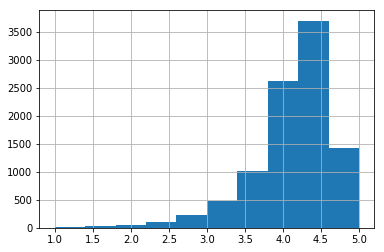

In [49]:
dataset_imput['Rating'].hist()

In [50]:
dataset_imput['RatingLog'] = np.log2(dataset_imput['Rating'])
dataset_imput['RatingLog'].describe()

count    9659.000000
mean        2.042980
std         0.233504
min         0.000000
25%         1.995683
50%         2.104337
75%         2.169925
max         2.321928
Name: RatingLog, dtype: float64

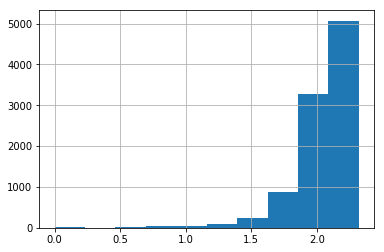

In [51]:
dataset_imput['RatingLog'].hist()

In [52]:
q1 = dataset_imput['RatingLog'].quantile(q=0.25)
q3 = dataset_imput['RatingLog'].quantile(q=0.75)
iqr = q3 - q1
dataset_imput2 = dataset_imput[(dataset_imput['RatingLog'] > (q1-1.5*iqr)) & (dataset_imput['RatingLog'] < (q3+1.5*iqr))]
print(len(dataset_imput2))

8910


Univariado - Tukey e Z-Score para remoção baseando-se na coluna de preço

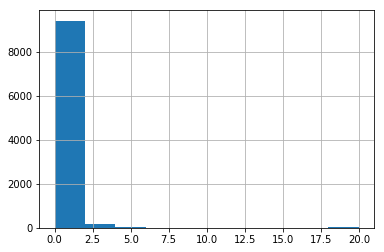

In [54]:
dataset_imput['PriceSqrt'] = np.sqrt(dataset_imput['Price'])
dataset_imput['PriceSqrt'].hist()

In [55]:
dataset_imput['PriceSqrt'].describe()

count    9659.000000
mean        0.184262
std         1.031207
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: PriceSqrt, dtype: float64

In [56]:
q1 = dataset_imput['PriceSqrt'].quantile(q=0.25)
q3 = dataset_imput['PriceSqrt'].quantile(q=0.75)
iqr = q3 - q1
dataset_imput3 = dataset_imput[(dataset_imput['PriceSqrt'] > (q1-1.5*iqr)) & (dataset_imput['PriceSqrt'] < (q3+1.5*iqr))]
print(len(dataset_imput3))

0


In [65]:
mad = dataset_imput['PriceSqrt'].mad()
dataset_imput3 = dataset_imput[abs(dataset_imput['PriceSqrt']-dataset_imput['PriceSqrt'].median())/mad < 3.5]
print(len(dataset_imput3))

9057


Bivariado: Z-score robusto. Será usada a razão de preço pela nota (colunas Price e Rating)

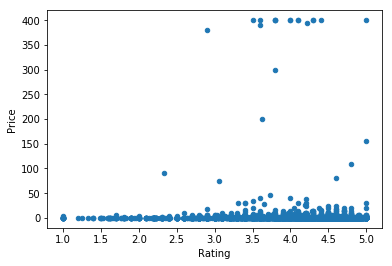

In [53]:
dataset_imput.plot.scatter(x='Rating',y='Price')

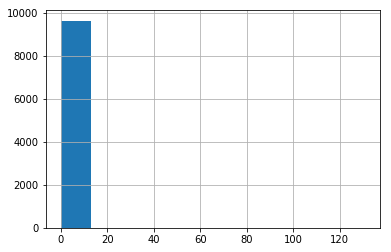

In [68]:
dataset_imput['PriceRating'] = dataset_imput['Price']/dataset_imput['Rating']
dataset_imput['PriceRating'].hist()

In [66]:
dataset_imput['PriceRatingSqrt'] = np.sqrt(dataset_imput['PriceRating'])
dataset_imput['PriceRatingSqrt'].describe()

count    9659.000000
mean        0.091141
std         0.519079
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.446879
Name: PriceRatingSqrt, dtype: float64

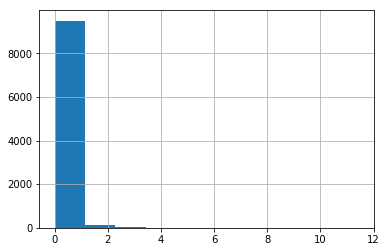

In [70]:
dataset_imput['PriceRatingSqrt'].hist()

In [71]:
mad = dataset_imput['PriceRatingSqrt'].mad()
dataset_imput4 = dataset_imput[abs(dataset_imput['PriceRatingSqrt']-dataset_imput['PriceRatingSqrt'].median())/mad < 3.5]
print(len(dataset_imput4))

9077


Multivariado - Isolation Forest

In [72]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
dtset = dataset_imput[['Category','Rating','Type','Price','Installs','Reviews','Size','Content Rating','Current Ver','Android Ver']]
clf.fit(dtset)

#scores = clf.predict(dataset_imput)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=<mtrand.RandomState object at 0x7f6b78bcd948>,
        verbose=0)

In [73]:
scores = clf.predict(dtset)
dtset['outlier'] = scores
dtset.outlier.describe()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


count    9659.000000
mean        0.799979
std         0.600059
min        -1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: outlier, dtype: float64

In [75]:
len(dtset[dtset['outlier']!=1])

966

# Testes de hipótese e visualizações


In [0]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

1) Há diferença entre a quantidade de resenhas de aplicativos pagos e gratuitos (relação entre as colunas Reviews e Type)

In [99]:
len(dataset_imput4[dataset_imput4['Type']==0])

8905

In [86]:
dataset_imput4.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

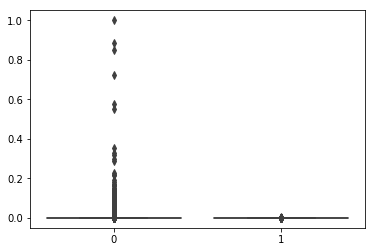

In [81]:
reviews_freeapps = dataset_imput4[dataset_imput4['Type']==0]['ReviewsNorm']
reviews_paidapps = dataset_imput4[dataset_imput4['Type']==1]['ReviewsNorm']

sns.boxplot(data=[reviews_freeapps,reviews_paidapps])

In [82]:
stats.mannwhitneyu(reviews_freeapps,reviews_paidapps)

MannwhitneyuResult(statistic=415493.5, pvalue=3.7767433050318977e-25)

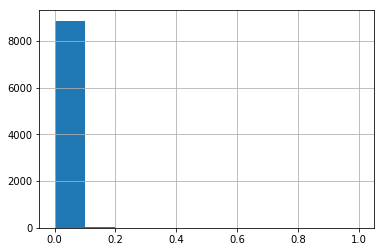

In [83]:
reviews_freeapps.hist()

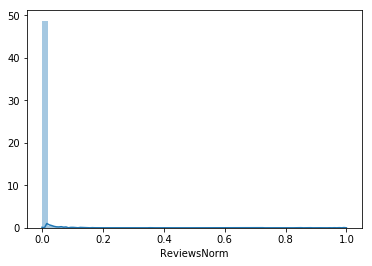

In [98]:
sns.distplot(reviews_freeapps)

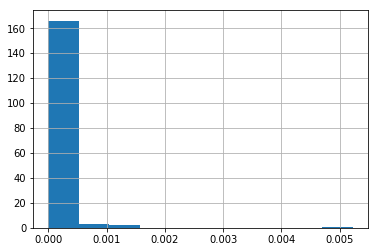

In [84]:
reviews_paidapps.hist()

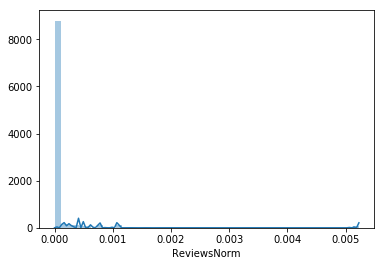

In [97]:
sns.distplot(reviews_paidapps)

In [88]:
reviews_freeapps.describe()

count    8.905000e+03
mean     2.998339e-03
std      2.438884e-02
min      0.000000e+00
25%      3.711848e-07
50%      1.752248e-05
75%      4.501831e-04
max      1.000000e+00
Name: ReviewsNorm, dtype: float64

In [89]:
reviews_paidapps.describe()

count    1.720000e+02
mean     7.202897e-05
std      4.268417e-04
min      0.000000e+00
25%      3.839842e-08
50%      2.623892e-07
75%      2.947079e-06
max      5.225923e-03
Name: ReviewsNorm, dtype: float64

2) Há diferenças nas notas dadas pelos aplicativos gratuitos e pelos pagos

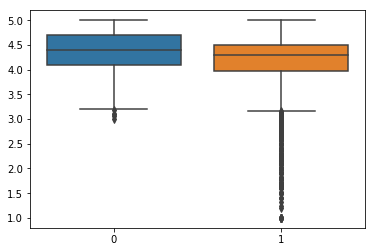

In [105]:
rating_freeapps = dataset_imput4[dataset_imput4['Type']==0]['Rating']
rating_paidapps = dataset_imput4[dataset_imput4['Type']==1]['Rating']

sns.boxplot(data=[rating_paidapps,rating_freeapps])

In [103]:
stats.mannwhitneyu(rating_freeapps,rating_paidapps)

MannwhitneyuResult(statistic=606094.5, pvalue=1.2891677657592525e-06)

In [106]:
dataset.Category.describe()

count    9659.000000
mean       16.771198
std         8.395104
min         0.000000
25%        11.000000
50%        14.000000
75%        25.000000
max        32.000000
Name: Category, dtype: float64

3) Aplicativos de classificação indicativa livre possui mais resenhas do que aplicativos para público adolescente

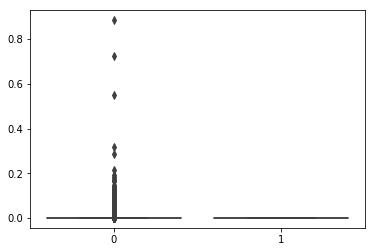

In [107]:
everyone_reviews = dataset_imput4[dataset_imput4['Content Rating']==0]['ReviewsNorm']
teen_reviews = dataset_imput4[dataset_imput4['Content Rating']==1]['ReviewsNorm']

sns.boxplot(data=[teen_reviews,everyone_reviews])

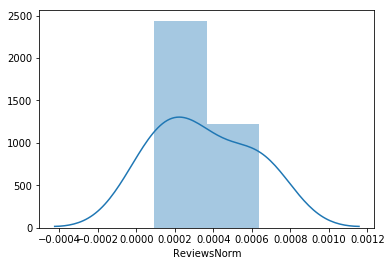

In [108]:
sns.distplot(everyone_reviews)

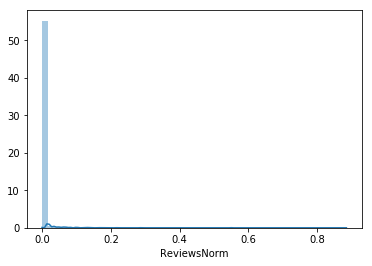

In [109]:
sns.distplot(teen_reviews)

In [110]:
stats.mannwhitneyu(teen_reviews,everyone_reviews)

MannwhitneyuResult(statistic=5747.0, pvalue=0.0739950882947738)

In [111]:
everyone_reviews.describe()

count    3.000000
mean     0.000347
std      0.000275
min      0.000094
25%      0.000201
50%      0.000307
75%      0.000474
max      0.000640
Name: ReviewsNorm, dtype: float64

In [112]:
teen_reviews.describe()

count    7.401000e+03
mean     2.246445e-03
std      1.861060e-02
min      0.000000e+00
25%      2.687890e-07
50%      8.806038e-06
75%      3.097217e-04
max      8.845675e-01
Name: ReviewsNorm, dtype: float64